<p align="right">
    <img src="Zewail-City.png">
</p>


---

# __Tight-Binding Model in 3D__


### Tight-Binding in Three Dimensions

A higher-dimensional lattice is considered, where an electron is restricted to occupy discrete positions $\mathbf{r} \in \Lambda$, with $\Lambda$ denoting the set of lattice points **(Bravais Basis)**. The Hilbert space is spanned by the basis states $|\mathbf{r}\rangle$, and a Hamiltonian is constructed to describe hopping processes between these sites.

The general form of the tight-binding Hamiltonian in higher dimensions can be written as:

$$
H = \sum_{\mathbf{r} \in \Lambda} E_0 |\mathbf{r}\rangle \langle \mathbf{r}| - \sum_{\langle \mathbf{r}, \mathbf{r}' \rangle} t_{\mathbf{r}' - \mathbf{r}} \left( |\mathbf{r}\rangle \langle \mathbf{r}'| + |\mathbf{r}'\rangle \langle \mathbf{r}| \right)
$$

Here, the sum over $\langle \mathbf{r}, \mathbf{r}' \rangle$ includes only nearest-neighbor pairs. The hopping amplitude $t_{\mathbf{r}' - \mathbf{r}}$ is assumed to depend solely on the relative position vector between sites.

Alternatively, if the nearest neighbors are characterized by a finite set of displacement vectors $\{ \mathbf{a} \}$, the Hamiltonian may be expressed more compactly as:

$$
H = \sum_{\mathbf{r} \in \Lambda} E_0 |\mathbf{r}\rangle \langle \mathbf{r}| - \sum_{\mathbf{r} \in \Lambda} \sum_{\mathbf{a}} t_{\mathbf{a}} |\mathbf{r}\rangle \langle \mathbf{r} + \mathbf{a}|
\tag{2.34}
$$

This form ensures Hermiticity provided the condition $t_{-\mathbf{a}} = t_{\mathbf{a}}$ is satisfied. Due to translational symmetry, this Hamiltonian can be diagonalized straightforwardly.

### Bloch Eigenstates and Dispersion Relation

The eigenstates of the Hamiltonian are given by Bloch states of the form:

$$
|\psi(\mathbf{k})\rangle = \frac{1}{\sqrt{N}} \sum_{\mathbf{r} \in \Lambda} e^{i\mathbf{k} \cdot \mathbf{r}} |\mathbf{r}\rangle
\tag{2.35}
$$

where $N$ denotes the total number of lattice sites, and $\mathbf{k}$ is the crystal momentum vector that spans the first Brillouin zone. These eigenstates are found to satisfy:

$$
H |\psi(\mathbf{k})\rangle = E(\mathbf{k}) |\psi(\mathbf{k})\rangle
$$

with corresponding dispersion relation:

$$
E(\mathbf{k}) = E_0 - \sum_{\mathbf{a}} 2t_{\mathbf{a}} \cos(\mathbf{k} \cdot \mathbf{a})
\tag{2.36}
$$

This form reflects the interference between forward and backward hopping paths across each lattice vector $\mathbf{a}$.



### **Example:** Cubic Lattice

As a specific case, a simple cubic lattice in three dimensions is considered. The nearest-neighbor vectors are given by:

$$
\mathbf{a} \in \{ (\pm a, 0, 0), (0, \pm a, 0), (0, 0, \pm a) \}
$$

and it is assumed that all hopping amplitudes are equal: $t_{\mathbf{a}} = t$. The resulting dispersion relation becomes:

$$
E(\mathbf{k}) = E_0 - 2t \left[ \cos(k_x a) + \cos(k_y a) + \cos(k_z a) \right]
$$

This single energy band is bounded in width by:

$$
\Delta E = E_{\text{max}} - E_{\text{min}} = 12t
$$

### Low-Momentum Limit and Effective Mass

In the long-wavelength (small-$\mathbf{k}$) limit, the cosine terms may be expanded using a Taylor series:

$$
\cos(k_i a) \approx 1 - \frac{1}{2}(k_i a)^2 + \mathcal{O}(k_i^4)
$$

Substituting this into the dispersion relation yields:

$$
E(\mathbf{k}) \approx E_0 - 6t + t a^2 |\mathbf{k}|^2
$$

This expression mirrors the kinetic energy of a free particle:

$$
E_{\text{free}} = \text{const.} + \frac{\hbar^2 |\mathbf{k}|^2}{2 m^\ast}
\tag{2.37}
$$

Thus, an **effective mass** can be identified as:

$$
m^\ast = \frac{\hbar^2}{2ta^2}
$$

This effective mass arises from the lattice geometry rather than the intrinsic mass of the electron.


### Constant-Energy Contours

At higher values of $\mathbf{k}$, the energy spectrum deviates from the free-particle form due to the lattice-induced band structure. For example, the conditions $k_x = \pm k_y = \pi/a$, with $k_z = 0$, define a line in momentum space along which the energy remains constant. These features are determined by the symmetry and periodicity of the underlying lattice.


In [1]:
# Main Library
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde
import plotly.graph_objects as go
from matplotlib.animation import FuncAnimation

In [2]:
# Parameters
a = 1.0        # Lattice spacing
t = 1.0        # Hopping parameter
E0 = 0.0       # On-site energy
hbar = 1.0     # Planck constant (set to 1 for simplicity)
E_fermi = 0.0  # Fermi energy

In [3]:
# Create a 3D grid in the Brillouin zone
n = 50
k_vals = np.linspace(-np.pi/a, np.pi/a, n)
KX, KY, KZ = np.meshgrid(k_vals, k_vals, k_vals, indexing='ij')

# Tight-Binding Dispersion (3D) 
E_tb = E0 - 2 * t * (np.cos(KX * a) + np.cos(KY * a) + np.cos(KZ * a))

# Free particle approximation near k=0
k_squared = KX**2 + KY**2 + KZ**2
m_eff = hbar**2 / (2 * t * a**2)
E_free = E0 - 6 * t + hbar**2 * k_squared / (2 * m_eff)

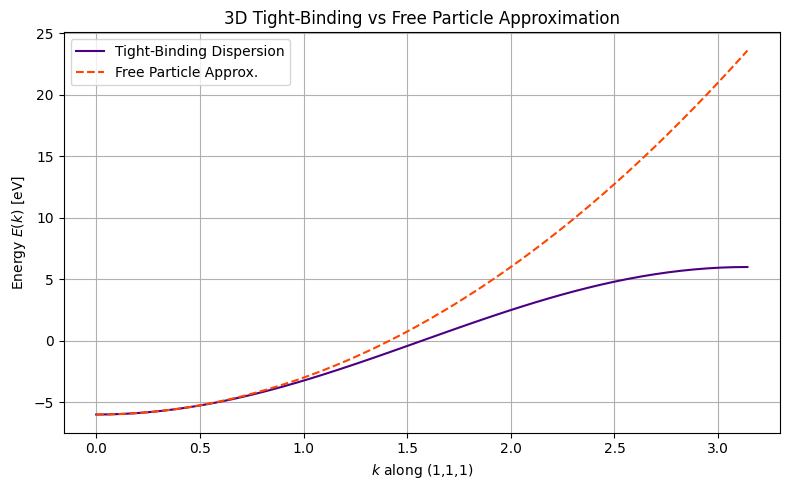

In [4]:
# Plot along high-symmetry direction: (0,0,0) to (π,π,π)
k_path = np.linspace(0, np.pi, n)
E_path_tb = E0 - 2 * t * (np.cos(k_path) * 3)
E_path_free = E0 - 6 * t + hbar**2 * (3 * k_path**2) / (2 * m_eff)

#  Plotting 
plt.figure(figsize=(8, 5))
plt.plot(k_path, E_path_tb, label='Tight-Binding Dispersion', color='indigo')
plt.plot(k_path, E_path_free, '--', label='Free Particle Approx.', color='orangered')

plt.xlabel(r"$k$ along (1,1,1)")
plt.ylabel(r"Energy $E(k)$ [eV]")
plt.title("3D Tight-Binding vs Free Particle Approximation")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
# 2D Dispersion Function
def dispersion_2D(kx, ky):
    return E0 - 2 * t * (np.cos(kx * a) + np.cos(ky * a))

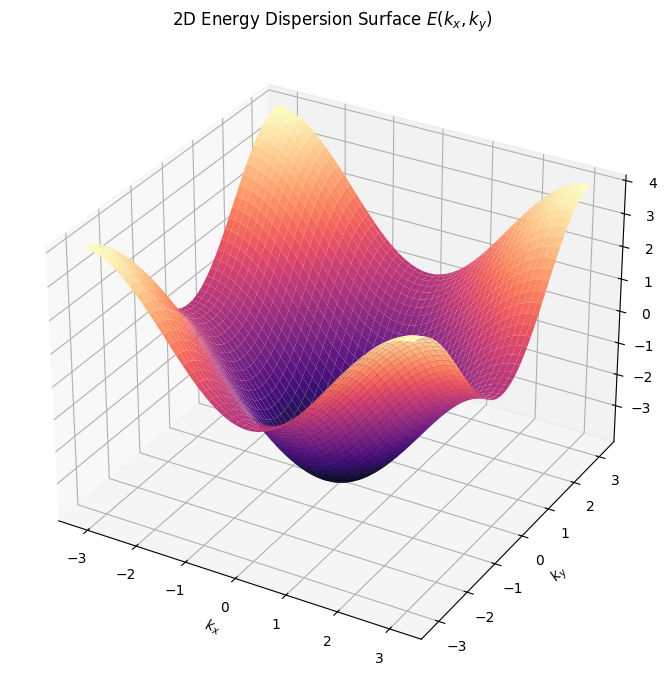

In [6]:
# Define grid and evaluate dispersion
kpts = 200
kx_vals = np.linspace(-np.pi, np.pi, kpts)
ky_vals = np.linspace(-np.pi, np.pi, kpts)
KX_2D, KY_2D = np.meshgrid(kx_vals, ky_vals)
E_2D = dispersion_2D(KX_2D, KY_2D)

# 3D energy surface plot

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(KX_2D, KY_2D, E_2D, cmap='magma', edgecolor='none')

ax.set_title('2D Energy Dispersion Surface $E(k_x, k_y)$')
ax.set_xlabel('$k_x$')
ax.set_ylabel('$k_y$')
ax.set_zlabel('$E(k)$ [eV]')
plt.tight_layout()
plt.show()

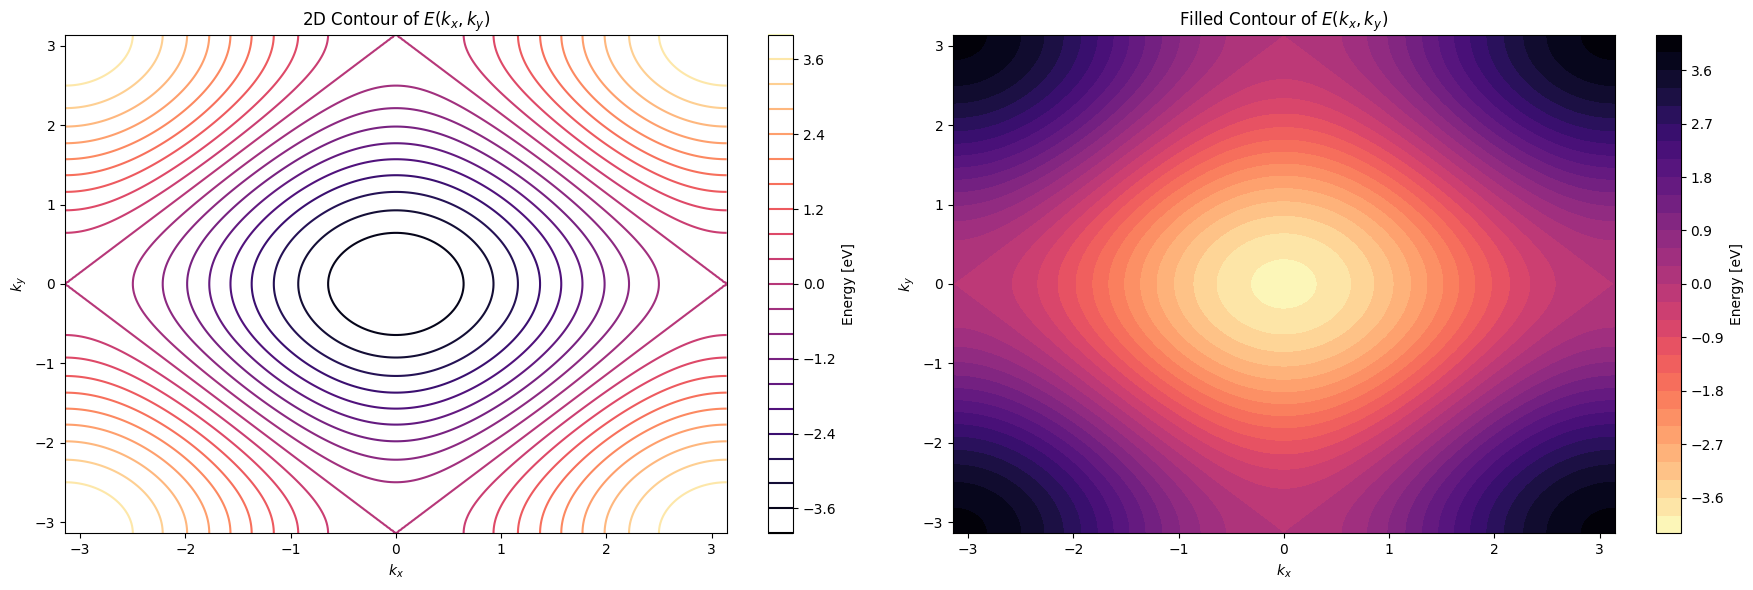

In [7]:
#  Create figure with subplots 
fig = plt.figure(figsize=(18, 6))

# Contour Plot
ax1 = fig.add_subplot(1, 2, 1)
contour = ax1.contour(KX_2D, KY_2D, E_2D, levels=20, cmap='magma')
ax1.set_title('2D Contour of $E(k_x, k_y)$')
ax1.set_xlabel('$k_x$')
ax1.set_ylabel('$k_y$')
fig.colorbar(contour, ax=ax1, label='Energy [eV]')

# Filled Contour Plot
ax2 = fig.add_subplot(1, 2, 2)
contourf = ax2.contourf(KX_2D, KY_2D, E_2D, levels=30, cmap='magma_r')
ax2.set_title('Filled Contour of $E(k_x, k_y)$')
ax2.set_xlabel('$k_x$')
ax2.set_ylabel('$k_y$')
fig.colorbar(contourf, ax=ax2, label='Energy [eV]')

plt.tight_layout()
plt.show()


#### Fermi Surface

The **Fermi surface** is the surface in reciprocal space (k-space) where the electron energy equals the **Fermi energy $ E_F $** — the highest occupied energy level at zero temperature. It separates occupied states ($ E(\mathbf{k}) < E_F $) from unoccupied ones and governs many electronic properties, such as conductivity and response to magnetic fields.

So, the setup:
- We set $ E_F = 0 $ (mid-band), corresponding to **half-filling** of the band (one electron per site on average).
- The Fermi surface is extracted numerically by finding all $ \mathbf{k} $-points where $ |E(\mathbf{k}) - E_F| < \delta $, for a small tolerance $ \delta $.
- The resulting points form a **closed surface** that evolves from spherical (at low carrier density) toward the boundary of the Brillouin zone as $ E_F $ approaches the band maximum.

#### Physics Insight

At half-filling ($ E_F = E_0 $), the Fermi surface of this 3D tight-binding model begins to touch the boundaries of the Brillouin zone. Due to the periodicity of the lattice and the cosine-based dispersion, the Fermi surface exhibits **warped, octahedral-like shapes** that reflect the underlying cubic symmetry.

This is in contrast to a free electron gas in continuous space, which has a **spherical Fermi surface**. Here, the lattice modifies the dispersion, leading to anisotropic electron dynamics and directional dependence in transport properties.

This calculation illustrates how **band structure geometry** — shaped by lattice symmetry and hopping — determines the topology of the Fermi surface, a key concept in understanding metals, semiconductors, and quantum phenomena like nesting and superconductivity.

In [8]:
#  3D k-space grid 
kpts = 100
kx_vals = np.linspace(-np.pi, np.pi, kpts)
ky_vals = np.linspace(-np.pi, np.pi, kpts)
kz_vals = np.linspace(-np.pi, np.pi, kpts)
KX, KY, KZ = np.meshgrid(kx_vals, ky_vals, kz_vals, indexing='ij')

#  3D dispersion function 
def dispersion_3D(kx, ky, kz, t=1.0, a=1.0, E0=0.0):
    return E0 - 2 * t * (np.cos(kx * a) + np.cos(ky * a) + np.cos(kz * a))

E_3D = dispersion_3D(KX, KY, KZ)


In [9]:
# Extract Fermi surface points
fermi_tol = 0.025  # Energy window around E_F
fermi_mask = np.abs(E_3D - E_fermi) < fermi_tol

kx_fs = KX[fermi_mask]
ky_fs = KY[fermi_mask]
kz_fs = KZ[fermi_mask]

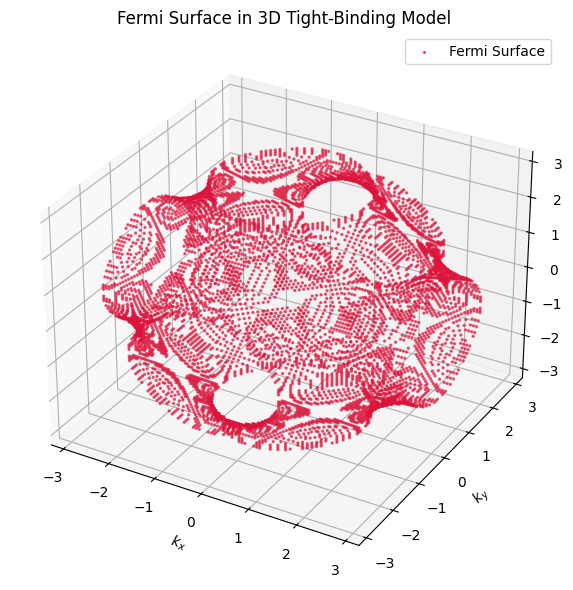

In [10]:
# Plot Fermi surface as 3D scatter
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(kx_fs, ky_fs, kz_fs, c='crimson', s=2, alpha=0.6, label='Fermi Surface')

ax.set_title("Fermi Surface in 3D Tight-Binding Model")
ax.set_xlabel('$k_x$')
ax.set_ylabel('$k_y$')
ax.set_zlabel('$k_z$')
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(-np.pi, np.pi)
ax.set_zlim(-np.pi, np.pi)
ax.legend()
plt.tight_layout()
plt.show()

### Computing the Density of States (DOS)

The **Density of States (DOS)**, denoted $ D(E) $, is a fundamental quantity in condensed matter physics that measures the number of electronic states per unit energy interval. It plays a crucial role in determining thermodynamic and transport properties of materials — such as specific heat, conductivity, and optical response.

In a periodic solid, the allowed electron energies form bands $ E(\mathbf{k}) $, where $ \mathbf{k} $ is the crystal momentum. The DOS is defined as:

$$
D(E) = \frac{1}{(2\pi)^d} \int_{\text{BZ}} d^d\mathbf{k} \; \delta\left(E - E(\mathbf{k})\right)
$$

where $ d $ is the dimension (here $ d=3 $), and the integral is over the first Brillouin zone (BZ). Physically, this means we "count" how many $ \mathbf{k} $-states correspond to a given energy $ E $.

In [11]:
E_flat = E_3D.flatten()

# Histogram
n_bins = 300
E_hist, bins = np.histogram(E_flat, bins=n_bins, density=True)
E_centers = 0.5 * (bins[:-1] + bins[1:])

# KDE
kde = gaussian_kde(E_flat)
E_kde_range = np.linspace(E_flat.min(), E_flat.max(), 1000)
DOS_kde = kde(E_kde_range)

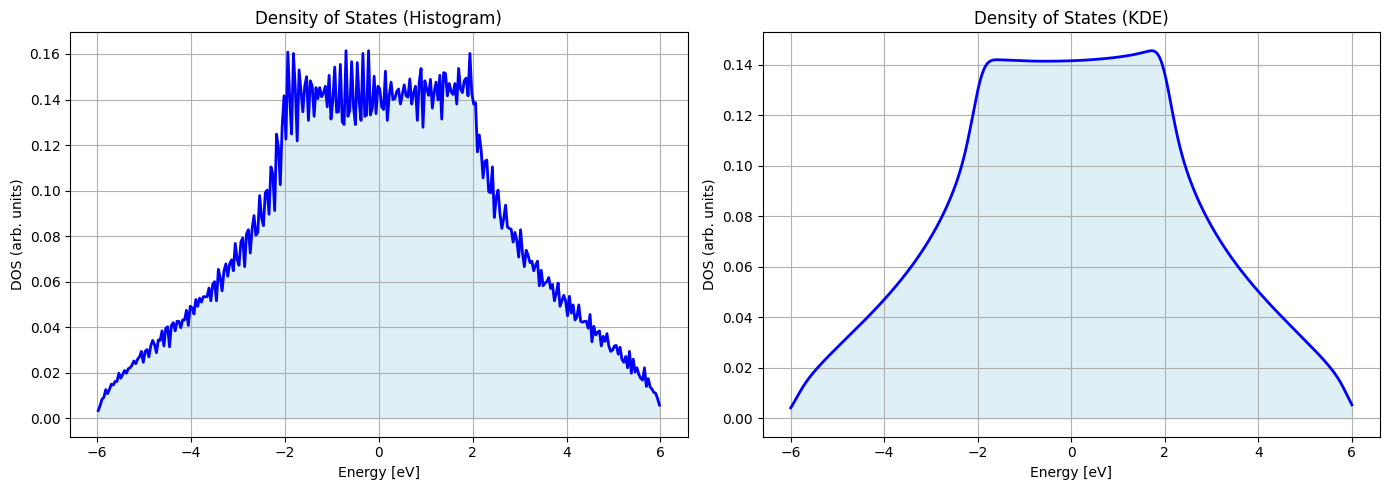

In [12]:
# Plotting Subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Histogram DOS
axs[0].plot(E_centers, E_hist, color='blue', lw=2)
axs[0].fill_between(E_centers, E_hist, color='lightblue', alpha=0.4)
axs[0].set_title("Density of States (Histogram)")
axs[0].set_xlabel("Energy [eV]")
axs[0].set_ylabel("DOS (arb. units)")
axs[0].grid(True)

# KDE DOS
axs[1].plot(E_kde_range, DOS_kde, color='blue', lw=2)
axs[1].fill_between(E_kde_range, DOS_kde, color='lightblue', alpha=0.4)
axs[1].set_title("Density of States (KDE)")
axs[1].set_xlabel("Energy [eV]")
axs[1].set_ylabel("DOS (arb. units)")
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [13]:
# Create interactive 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=kx_fs, y=ky_fs, z=kz_fs,
    mode='markers',
    marker=dict(size=3, color='crimson', opacity=0.3),
    name='Fermi Surface'
)])

fig.update_layout(
    title="Fermi Surface in 3D Tight-Binding Model",
    scene=dict(
        xaxis_title='k_x',
        yaxis_title='k_y',
        zaxis_title='k_z',
        xaxis_range=[-np.pi, np.pi],
        yaxis_range=[-np.pi, np.pi],
        zaxis_range=[-np.pi, np.pi]
    ),
    width=800, height=600
)

# Show interactive plot
fig.show()

In [14]:
# Save as standalone HTML
fig.write_html("SC_fermi_surface_interactive.html")
print("Interactive 3D plot saved as 'SC_fermi_surface_interactive.html'")

Interactive 3D plot saved as 'SC_fermi_surface_interactive.html'


---

## Key Physical Insights to Remember: 

### _Bloch Functions — Delocalized, Momentum Space Picture_

* **Definition**:

  $$
  \psi_{n\mathbf{k}}(\mathbf{r}) = e^{i\mathbf{k} \cdot \mathbf{r}} u_{n\mathbf{k}}(\mathbf{r}), \quad u_{n\mathbf{k}}(\mathbf{r} + \mathbf{R}) = u_{n\mathbf{k}}(\mathbf{r})
  $$
* **Labeled by**: Band index \$n\$ and crystal momentum \$\mathbf{k}\$.
* **Physical role**: Describe **propagating electron waves** in periodic potentials.
* **Ideal for**: Band structure, Fermi surfaces, and transport analysis.

**Properties:**

* **Delocalized**: Extend over the whole crystal.
  
* **Energy eigenstates**: $ H \psi\_{n\mathbf{k}} = E\_n(\mathbf{k}) \psi\_{n\mathbf{k}} $.

  
* **Translational covariance**: $ \psi\_{n\mathbf{k}}(\mathbf{r} + \mathbf{R}) = e^{i\mathbf{k} \cdot \mathbf{R}} \psi\_{n\mathbf{k}}(\mathbf{r}) $.

* **Continuous in $\mathbf{k}$**: Form smooth energy bands $E\_n(\mathbf{k})$.
  
* **Orthonormal**: $ \langle \psi\_{n\mathbf{k}} | \psi\_{n'\mathbf{k}'} \rangle = \delta\_{nn'} \delta\_{\mathbf{k},\mathbf{k}'} $.


###  _Wannier Functions — Localized, Real Space Picture_

* **Definition**:

  $$
  w_n(\mathbf{r} - \mathbf{R}) = \frac{1}{\sqrt{N}} \sum_{\mathbf{k}} e^{-i\mathbf{k} \cdot \mathbf{R}} \psi_{n\mathbf{k}}(\mathbf{r})
  $$
* **Labeled by**: Band index \$n\$ and lattice vector \$\mathbf{R}\$.
* **Physical role**: Represent **atomic-like orbitals** localized in space.
* **Ideal for**: Constructing tight-binding Hamiltonians and studying local interactions.

**Properties:**

* **Localized**: Exponentially decaying around site \$\mathbf{R}\$ (especially in insulators).
  
* **Orthonormal**: \$ \langle w\_n(r - \mathbf{R}) | w\_{n'}(r - \mathbf{R}') \rangle = \delta\_{nn'} \delta\_{\mathbf{R},\mathbf{R}'} \$.

  
* **Not unique**: Depend on the phase (gauge) choice of \$u\_{n\mathbf{k}}\$.

  
* **Real-valued** (can be chosen): Especially under time-reversal symmetry.

  
* **Useful for model building**: Tight-binding hopping terms:

  $$
  \langle w_n(\mathbf{R}) | H | w_n(\mathbf{R}') \rangle
  $$


In [15]:
# grids
x = np.linspace(-n * a, n * a, 1000)  # real-space grid
k_vals = np.linspace(-np.pi/a, np.pi/a, n)  # k-space points
n_center = len(x) // 2  # center index for plotting

# Define the periodic function u_nk(x) ~ i.e. cos(2πx/a)
def u_nk(x):
    return np.cos(2 * np.pi * x / a)

In [16]:
# Simulate a single Bloch function for k = π/2a
k_bloch = np.pi / (2 * a)
bloch_fn = np.exp(1j * k_bloch * x) * u_nk(x)

# Compute Wannier function via inverse Fourier transform over k
wannier_fn = np.zeros_like(x, dtype=np.complex128)

for k in k_vals:
    psi_k = np.exp(1j * k * x) * u_nk(x)  # Bloch function at k
    wannier_fn += psi_k * np.exp(-1j * k * 0)  # center at R = 0

wannier_fn /= np.sqrt(n)

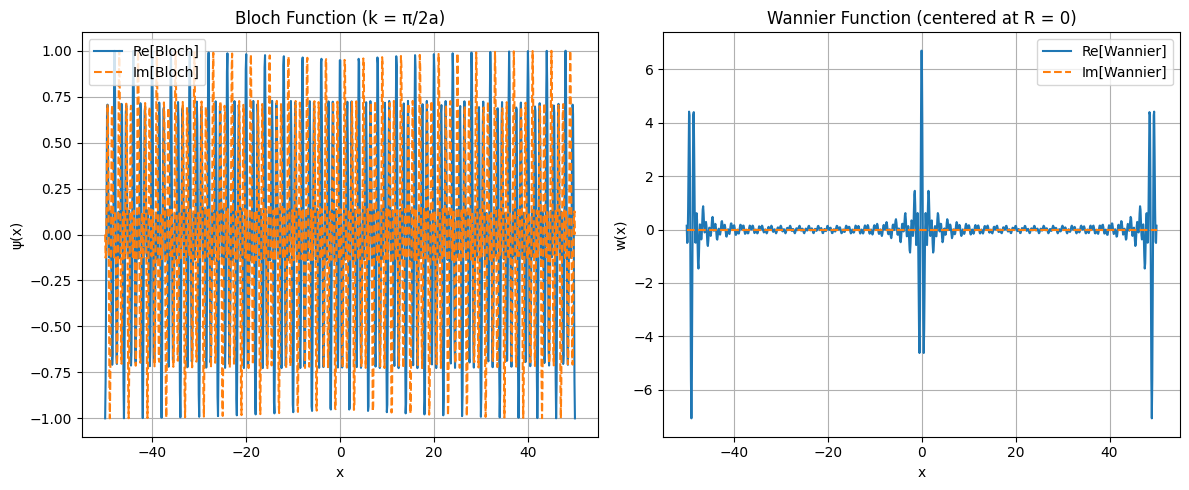

In [17]:
# Plotting
plt.figure(figsize=(12, 5))

# Bloch function (real part)
plt.subplot(1, 2, 1)
plt.plot(x, np.real(bloch_fn), label="Re[Bloch]")
plt.plot(x, np.imag(bloch_fn), label="Im[Bloch]", linestyle='--')
plt.title("Bloch Function (k = π/2a)")
plt.xlabel("x")
plt.ylabel("ψ(x)")
plt.legend()
plt.grid(True)

# Wannier function (real part)
plt.subplot(1, 2, 2)
plt.plot(x, np.real(wannier_fn), label="Re[Wannier]")
plt.plot(x, np.imag(wannier_fn), label="Im[Wannier]", linestyle='--')
plt.title("Wannier Function (centered at R = 0)")
plt.xlabel("x")
plt.ylabel("w(x)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


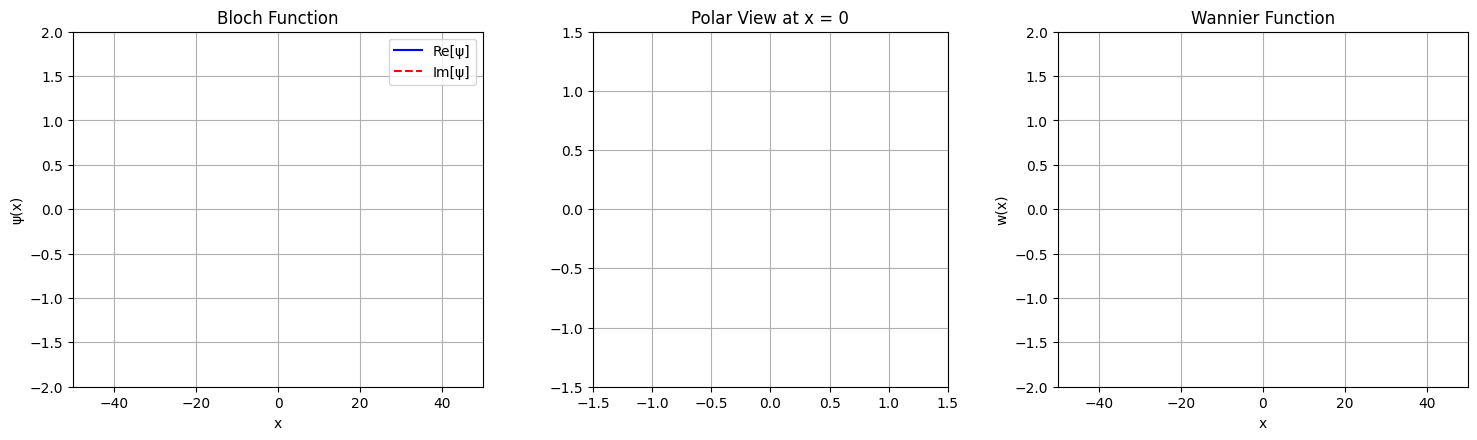

In [18]:
# Animation Parameters
center_idx = len(x) // 2
k_vals = np.arange(0, 10 * np.pi + 0.01, 0.1 * np.pi)

# Setup figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
fig.subplots_adjust(top=0.82)
(ax1, ax2, ax3) = axs

# Plot 1: Bloch function (Real + Imag)
line_real, = ax1.plot([], [], label='Re[ψ]', color='blue')
line_imag, = ax1.plot([], [], label='Im[ψ]', color='red', linestyle='--')
ax1.set_xlim(x[0], x[-1])
ax1.set_ylim(-2, 2)
ax1.set_title("Bloch Function")
ax1.set_xlabel("x")
ax1.set_ylabel("ψ(x)")
ax1.legend()
ax1.grid(True)

# Plot 2: Polar plot at center
line_polar, = ax2.plot([], [], marker='o', color='purple')
ax2.set_xlim(-1.5, 1.5)
ax2.set_ylim(-1.5, 1.5)
ax2.set_aspect('equal')
ax2.set_title("Polar View at x = 0")
ax2.grid(True)

# Plot 3: Wannier function
line_wannier, = ax3.plot([], [], label='Re[w]', color='green')
ax3.set_xlim(x[0], x[-1])
ax3.set_ylim(-2, 2)
ax3.set_title("Wannier Function")
ax3.set_xlabel("x")
ax3.set_ylabel("w(x)")
ax3.grid(True)

# Store cumulative sum for Wannier function
bloch_sum = np.zeros_like(x, dtype=np.complex128)

In [19]:
# Animation update function
def update(frame):
    global bloch_sum
    k = k_vals[frame]
    psi_k = np.exp(1j * k * x) * u_nk(x)

    # Dynamic main title
    k_frac = round(k / np.pi, 1)
    fig.suptitle(f"Bloch and Wannier Functions Evolution — $k = {k_frac}\\pi$", fontsize=16)
    
    # Update Bloch function plot
    line_real.set_data(x, np.real(psi_k))
    line_imag.set_data(x, np.imag(psi_k))
    ax1.set_title(f"Bloch Function")

    # Update polar plot
    center_val = psi_k[center_idx]
    line_polar.set_data([0, np.real(center_val)], [0, np.imag(center_val)])
    ax2.set_title(f"Polar Plot")

    # Update Wannier function: accumulate Bloch states
    bloch_sum += psi_k * np.exp(-1j * k * 0)  # centered at R = 0
    wannier_fn = bloch_sum / np.sqrt(frame + 1)
    line_wannier.set_data(x, np.real(wannier_fn))
    ax3.set_title(f"Wannier Function")

    return line_real, line_imag, line_polar, line_wannier

In [20]:
# Create animation
ani = FuncAnimation(fig, update, frames=len(k_vals), interval=400, blit=True)

# Save the animation
ani.save("Bloch_and_Wannier_Functions_Evolution.gif", writer="pillow", fps=10)

---